# Clustering Crypto

In [2]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [40]:
# Load the crypto_data.csv dataset.
df = pd.read_csv('crypto_data.csv', index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [41]:
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])

 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  1252
Number of Columns:  6


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1252 non-null   object 
 1   Algorithm        1252 non-null   object 
 2   IsTrading        1252 non-null   bool   
 3   ProofType        1252 non-null   object 
 4   TotalCoinsMined  744 non-null    float64
 5   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 59.9+ KB


In [43]:
# Keep all the cryptocurrencies that are being traded - looking for 1144
df = df.loc[df.IsTrading]

# computing number of rows after filter
rows = len(df.axes[0])
 
# computing number of columns after filter
cols = len(df.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  1144
Number of Columns:  6


In [44]:
# Remove the "IsTrading" column.

df = df.drop('IsTrading', axis=1)
# computing number of rows after drop
rows = len(df.axes[0])
 
# computing number of columns after drop
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)
df.head(10)

Number of Rows:  1144
Number of Columns:  5


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [45]:
# Remove rows that have at least 1 null value. - looking for 685 rows
df = df.dropna()

# computing number of rows after dropping nulls
rows = len(df.axes[0])
 
# computing number of columns after dropping nulls
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

df.head()

Number of Rows:  685
Number of Columns:  5


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [47]:
# Keep the rows where coins are mined. Looking for 532
df_mined = df[df.TotalCoinsMined > 0]

# computing number of rows after dropping nulls
rows = len(df_mined.axes[0])
 
# computing number of columns after dropping nulls
cols = len(df_mined.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

df_mined.head(10)

Number of Rows:  532
Number of Columns:  5


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [50]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_name_df = df_mined[['CoinName']]

crypto_name_df.head(5)

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [55]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.Should be 532 rows and 4 columns
df = df_mined.drop('CoinName', axis=1)

df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [57]:
# Use get_dummies() to create variables for text features. looking for 532 rows and 98 columns. 
dummies_df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])

X = dummies_df

# computing number of rows after doing get_dummies
X_rows = len(X.axes[0])
 
# computing number of columns after doing get_dummies
X_cols = len(X.axes[1])
print("Number of Rows: ", X_rows)
print("Number of Columns: ", X_cols)

X.head(10)

Number of Rows:  532
Number of Columns:  98


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# call it crypto_df like the instructions say to
crypto_df = df
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [58]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [60]:
# Using PCA to reduce dimension to three principal components.
# Initialize PCA model

pca = PCA(n_components=3)

# Get two principal components for the data.

X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[[-0.33860867  0.98452122 -0.56465523]
 [-0.3219344   0.98464504 -0.5651544 ]
 [ 2.30059098  1.73849987 -0.68241826]
 ...
 [ 0.32090859 -2.30467174  0.3851756 ]
 [-0.15402952 -1.99204618  0.50313169]
 [-0.2935906   0.76683023 -0.29601118]]


In [71]:
# Create a DataFrame with the three principal components. looking for 3 columns and 532 rows again
pcs_df = pd.DataFrame(
    data=X_pca, columns=["PC 1", "PC 2", "PC 3"]
)

# computing number of rows after PCA
pca_rows = len(pcs_df.axes[0])
 
# computing number of columns after PCA
pca_cols = len(pcs_df.axes[1])
print("Number of Rows: ", pca_rows)
print("Number of Columns: ", pca_cols)

pcs_df.head()

Number of Rows:  532
Number of Columns:  3


,PC 1,PC 2,PC 3
0,-0.338609,0.984521,-0.564655
1,-0.321934,0.984645,-0.565154
2,2.300591,1.738500,-0.682418
3,-0.138249,-1.234071,0.181280
4,-0.144353,-2.018152,0.326208


In [72]:
# Gain index back (should be fine - https://stackoverflow.com/questions/41981441/keep-pandas-index-while-applying-sklearn)
pcs_df.index = X.index
pcs_df.head(10)

,PC 1,PC 2,PC 3
42,-0.338609,0.984521,-0.564655
404,-0.321934,0.984645,-0.565154
1337,2.300591,1.738500,-0.682418
BTC,-0.138249,-1.234071,0.181280
ETH,-0.144353,-2.018152,0.326208
LTC,-0.169451,-1.182446,-0.018635
DASH,-0.397908,1.261247,-0.480894
XMR,-0.154955,-2.247601,0.399207
ETC,-0.142794,-2.018257,0.326173
ZEC,-0.154028,-1.992046,0.503132


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\kyleb\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


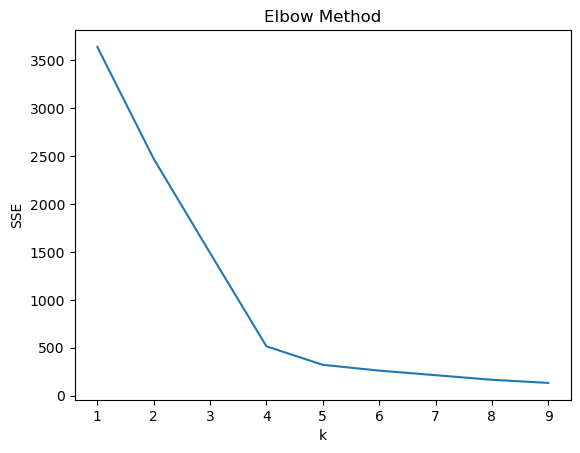

In [73]:
from matplotlib import pyplot as plt

# Create an elbow curve to find the best value for K.
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(pcs_df)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

Running K-Means with `k=4`

In [111]:
# Initialize the K-Means model.
# Create a KMeans model with 4 clusters
model = KMeans(n_clusters=4, random_state=42).fit(pcs_df)
# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [112]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pcs_df], axis = 1)
clustered_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.338609,0.984521,-0.564655
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.321934,0.984645,-0.565154
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.300591,1.738500,-0.682418
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.138249,-1.234071,0.181280
ETH,Ethash,PoW,1.076842e+08,0,-0.144353,-2.018152,0.326208
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.169451,-1.182446,-0.018635
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.397908,1.261247,-0.480894
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.154955,-2.247601,0.399207
ETC,Ethash,PoW,1.133597e+08,210000000,-0.142794,-2.018257,0.326173
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.154028,-1.992046,0.503132


In [113]:
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = pd.concat([clustered_df, crypto_name_df], axis=1)
clustered_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.338609,0.984521,-0.564655,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.321934,0.984645,-0.565154,404Coin
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.300591,1.738500,-0.682418,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.138249,-1.234071,0.181280,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0,-0.144353,-2.018152,0.326208,Ethereum
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.169451,-1.182446,-0.018635,Litecoin
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.397908,1.261247,-0.480894,Dash
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.154955,-2.247601,0.399207,Monero
ETC,Ethash,PoW,1.133597e+08,210000000,-0.142794,-2.018257,0.326173,Ethereum Classic
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.154028,-1.992046,0.503132,ZCash


In [114]:
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

clustered_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.338609,0.984521,-0.564655,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.321934,0.984645,-0.565154,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.300591,1.738500,-0.682418,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.138249,-1.234071,0.181280,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.144353,-2.018152,0.326208,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.169451,-1.182446,-0.018635,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.397908,1.261247,-0.480894,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.154955,-2.247601,0.399207,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.142794,-2.018257,0.326173,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.154028,-1.992046,0.503132,ZCash,0


In [115]:
# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.338609,0.984521,-0.564655,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.321934,0.984645,-0.565154,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.300591,1.738500,-0.682418,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.138249,-1.234071,0.181280,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.144353,-2.018152,0.326208,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.169451,-1.182446,-0.018635,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.397908,1.261247,-0.480894,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.154955,-2.247601,0.399207,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.142794,-2.018257,0.326173,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.154028,-1.992046,0.503132,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [116]:
# Creating a 3D-Scatter with the PCA data and the clusters

import plotly.express as px
fig = px.scatter_3d(
     clustered_df,
     x="PC 3",
     y="PC 2",
     z="PC 1",
     color="Class",
     symbol="Class",
     hover_name = 'CoinName',
     hover_data = ['Algorithm'],
     width=800

 )
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [117]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName','Algorithm','ProofType','TotalCoinSupply','TotalCoinsMined','Class'])

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [118]:
# Print the total number of tradable cryptocurrencies.
num_rows = len(clustered_df)
print(f'There are {num_rows} tradable cryptocurrencies.')

There are 532 tradable cryptocurrencies.


In [119]:
# Scaling data to create the scatter plot with tradable cryptocurrencies. (https://stackoverflow.com/questions/43834242/sklearn-minmaxscaler-scale-specific-columns-only)
scaled_tradables = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])
scaled_tradables

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [120]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
final_df = pd.DataFrame(
    data=scaled_tradables, columns=["TotalCoinSupply", "TotalCoinsMined"]
)

# Gain index back (should be fine - https://stackoverflow.com/questions/41981441/keep-pandas-index-while-applying-sklearn)
final_df.index = clustered_df.index
final_df.head(10)

,TotalCoinSupply,TotalCoinsMined
42,4.200000e-11,0.000000
404,5.320000e-04,0.001066
1337,3.141593e-01,0.029576
BTC,2.100000e-05,0.000018
ETH,0.000000e+00,0.000109
LTC,8.400000e-05,0.000064
DASH,2.200000e-05,0.000009
XMR,0.000000e+00,0.000017
ETC,2.100000e-04,0.000115
ZEC,2.100000e-05,0.000007


In [122]:
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
final_df['CoinName'] = clustered_df['CoinName']
final_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName
42,4.200000e-11,0.000000,42 Coin
404,5.320000e-04,0.001066,404Coin
1337,3.141593e-01,0.029576,EliteCoin
BTC,2.100000e-05,0.000018,Bitcoin
ETH,0.000000e+00,0.000109,Ethereum
LTC,8.400000e-05,0.000064,Litecoin
DASH,2.200000e-05,0.000009,Dash
XMR,0.000000e+00,0.000017,Monero
ETC,2.100000e-04,0.000115,Ethereum Classic
ZEC,2.100000e-05,0.000007,ZCash


In [123]:
# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
final_df['Class'] = clustered_df['Class']
final_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.141593e-01,0.029576,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,1
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


In [129]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
final_df.hvplot.scatter(
    x='TotalCoinsMined',
    y='TotalCoinSupply',
    legend='right',
    by='Class'
)


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)